In [1]:
import numpy as np
import matplotlib.pyplot as plt
from keras.models import Model
from itertools import chain #for target labels 
from keras.utils import np_utils
import seaborn as sns
import pandas as pd
import tensorflow
from tensorflow.keras.models import load_model
from sklearn.metrics import confusion_matrix
from tensorflow.keras.applications.vgg16 import preprocess_input
import cv2
import os
from PIL import Image # for grabbing images
from IPython.display import display, HTML
import warnings
warnings.filterwarnings("ignore")

2023-03-29 22:35:57.461029: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [2]:
X_test=np.load("test_data.npy");
t_test=np.load("test_labels.npy");
num_of_output_classes=len(np.unique(t_test))
N=X_test.shape[1]; #Number of pixels of image
print(num_of_output_classes)
X_test=tensorflow.keras.applications.vgg16.preprocess_input(X_test, data_format=None);

12


In [3]:
class_names=["Airport","Beach","Bridge","Dense Residental","Desert","Forest",
             "Industrial","Mountain","Parking","River","Sparse_Residental","Stadium"]

In [4]:
def conf_matrix_w_acc(y_test, labels):
    # Evaluate trained model in validation set
    cm = confusion_matrix(y_test, labels)
    acc =np.diagonal(cm).sum()/ cm.sum()
    # acc = accuracy_score(y_test,labels)
    fig, ax = plt.subplots()
    tick_marks = np.arange(len(class_names))
    plt.xticks(tick_marks, class_names)
    plt.yticks(tick_marks, class_names)
    # create heatmap
    sns.heatmap(pd.DataFrame(cm), annot=True ,fmt='g', xticklabels = class_names, yticklabels = class_names)
    ax.xaxis.set_label_position("top")
    plt.tight_layout()
    plt.title('Confusion Matrix (Accuracy = %f)' % acc, y=1.1)
    plt.ylabel('Actual label')
    plt.xlabel('Predicted label')

## Classifying Test Set From Data

In [5]:
def test(class_num,X_test,labels_test,model_name='vgg16_trained_cnn.hdf5',resized_pixel_size=100): 
        #Get Test Data Information, mainly for clarification on our end 
    
        #Setting up labels for keras model
        labels_test_model = np_utils.to_categorical(labels_test, num_classes=class_num)

        # Loads trained model 
        model = tensorflow.keras.models.load_model(model_name)

        #Can print model summary for illustration purposes
        #print(model.summary())

        #Evaluating model on test data 
        loss,accuracy=model.evaluate(X_test,labels_test_model)

        #Generates probability matrix of label assignment 
        y_proba = model.predict(X_test)

        #Grabs largest probability for each photo belonging to a certain class 
        y_classes = np.argmax(y_proba,axis=1)

        #Prints confustion matrix 
        print(conf_matrix_w_acc(labels_test, y_classes))
        
        return accuracy,y_classes

27/27 [==============================] - 29s 1s/step
None


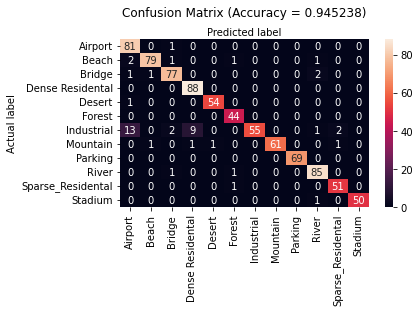

In [6]:
accuracy,y_classes=test(num_of_output_classes,X_test,t_test,model_name='vgg16_trained_cnn.hdf5',resized_pixel_size=100)

## Classifying 5 Images From Google Earth 
### Familiar Places to me
1. My childhood home in South Florida-Dense Residental
2. Fort Lauderdale Beach-Beach
3. My grandparents home in a village in New York-Sparse Residental 
4. My last summer residence outside of Chicago-Dense Residental
5. My Undergrad FSU- Industrial 
6. Ben Griffin Stadium at UF-Stadium

In [12]:
#Generates probability matrix of label assignment 

def custom_test_image_classification(model_name,Image):
    model = tensorflow.keras.models.load_model(model_name)
    y_proba = model.predict(Image)
    #Grabs largest probability for each photo belonging to a certain class 
    y_class = np.argmax(y_proba,axis=1)
    return y_proba,y_class

In [13]:
path_of_custom_image_classes='My_Custom_Images'
filenames = os.listdir(path_of_custom_image_classes)
all_images=[]
print(filenames)

['Stadium.png', 'Beach.png', 'Industrial.png', 'Dense-Residental_2.png', 'Sparse_Residental.png', 'Dense_Residental_1.png']


In [14]:
for file in filenames:
    image = Image.open(os.path.join(path_of_custom_image_classes,file))
    image = cv2.imread(os.path.join(path_of_custom_image_classes, file))
    image = cv2.resize(image,(100,100))
    all_images.append(image)

All_custom_images=np.array(all_images)
All_custom_images=tensorflow.keras.applications.vgg16.preprocess_input(All_custom_images, data_format=None);

(100, 100, 3)
(100, 100, 3)
(100, 100, 3)
(100, 100, 3)
(100, 100, 3)
(100, 100, 3)


In [15]:
# create figure
def plot_custom_images():
    fig = plt.figure(figsize=(10, 7))

    # setting values to rows and column variables
    rows = 2
    columns = 3
    
    # reading images
    Image1 = cv2.imread('My_Custom_Images'+ '/' + filenames[0])
    Image1 = cv2.cvtColor(Image1, cv2.COLOR_BGR2RGB)
    Image2 = cv2.imread('My_Custom_Images'+ '/' + filenames[1])
    Image2 = cv2.cvtColor(Image2, cv2.COLOR_BGR2RGB)
    Image3= cv2.imread('My_Custom_Images'+ '/' + filenames[2])
    Image3 = cv2.cvtColor(Image3, cv2.COLOR_BGR2RGB)
    Image4 = cv2.imread('My_Custom_Images'+ '/' + filenames[3])
    Image4 = cv2.cvtColor(Image4, cv2.COLOR_BGR2RGB)
    Image5 = cv2.imread('My_Custom_Images'+ '/' + filenames[4])
    Image5 = cv2.cvtColor(Image5, cv2.COLOR_BGR2RGB)
    Image6= cv2.imread('My_Custom_Images'+ '/' + filenames[5])
    Image6 = cv2.cvtColor(Image6, cv2.COLOR_BGR2RGB)

    # Adds a subplot at the 1st position
    fig.add_subplot(rows, columns, 1)

    # showing image
    plt.imshow(Image1)
    plt.axis('off')
    plt.title("Stadium")

    # Adds a subplot at the 2nd position
    fig.add_subplot(rows, columns, 2)

    # showing image
    plt.imshow(Image2)
    plt.axis('off')
    plt.title("Beach")

    # Adds a subplot at the 3rd position
    fig.add_subplot(rows, columns, 3)

    # showing image
    plt.imshow(Image3)
    plt.axis('off')
    plt.title("Industrial")

    # Adds a subplot at the 4th position
    fig.add_subplot(rows, columns, 4)

    # showing image
    plt.imshow(Image4)
    plt.axis('off')
    plt.title("Dense Residental")

    # Adds a subplot at the 4th position
    fig.add_subplot(rows, columns, 5)

    # showing image
    plt.imshow(Image5)
    plt.axis('off')
    plt.title("Sparse Residential")

    # Adds a subplot at the 4th position
    fig.add_subplot(rows, columns, 6)

    # showing image
    plt.imshow(Image6)
    plt.axis('off')
    plt.title("Dense Residential")

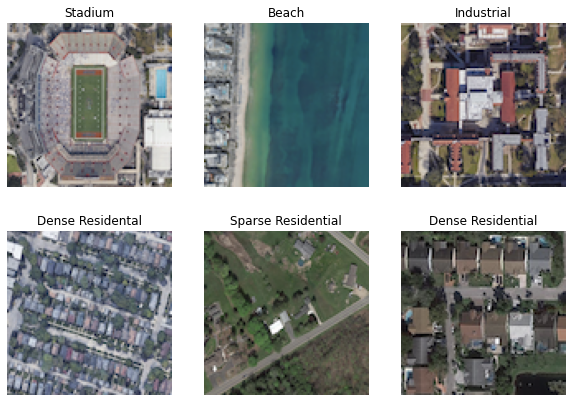

In [16]:
plot_custom_images()

In [17]:
y_proba,y_class=custom_test_image_classification('vgg16_trained_cnn.hdf5',All_custom_images)

print("\nClass Probabilities of Custom Images")
df = pd.DataFrame(y_proba*100,columns=[class_names],index=[filenames])
pd.set_option('display.float_format', lambda x: f'{x:.5f}')
display(HTML(df.to_html()))

1/1 [==============================] - 0s 297ms/step

Class Probabilities of Custom Images


,Airport,Beach,Bridge,Dense Residental,Desert,Forest,Industrial,Mountain,Parking,River,Sparse_Residental,Stadium
Stadium.png,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,100.00000
Beach.png,0.00443,99.86625,0.05148,0.00061,0.00009,0.00212,0.00038,0.00471,0.01947,0.05040,0.00004,0.00003
Industrial.png,0.46289,0.00001,0.09114,3.57703,0.00019,0.00001,95.68348,0.00007,0.02901,0.00293,0.15216,0.00108
Dense-Residental_2.png,0.00013,0.00000,0.00002,99.81361,0.00000,0.00000,0.18571,0.00005,0.00023,0.00025,0.00000,0.00000
Sparse_Residental.png,0.02156,0.00002,0.24136,0.06124,0.00005,0.00015,0.04564,0.00010,0.00275,0.00244,99.62451,0.00018
Dense_Residental_1.png,0.26387,0.00002,0.00847,82.47323,0.00098,0.00025,7.91963,0.00138,0.02534,0.00252,9.30399,0.00032


They all worked! I did have to make sure I focused on the proper area. For example, it became easily confused when I had industrial buildings around the stadium. Thus, the algorithm clearly has a height above the earth it works well at. 